In [1]:
!pip install seaborn

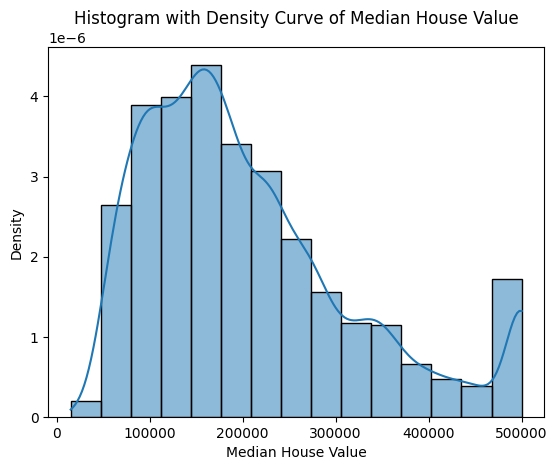

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("california_housing.csv")

sns.histplot(df['median_house_value'], kde=True, bins=15, stat='density')
plt.title('Histogram with Density Curve of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Density')
plt.show()

## Two Sample T-test Example

In [1]:
import pandas as pd
df = pd.read_csv("TeachingRatings.csv")

In [5]:
df.head(5)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1
1,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2
2,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3
3,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4
4,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5


In [6]:
df["credits"].unique()

array(['more', 'single'], dtype=object)

In [12]:
from statsmodels.stats.weightstats import ttest_ind
more = df[df["credits"] == "more"]["eval"]
single = df[df["credits"] == "single"]["eval"]
tstat,pvalue,degree_freedom = ttest_ind(more,single)
print("T Statistic:",tstat)
print("P-value:",pvalue)
print("Degree of Freedom:",degree_freedom)

T Statistic: -5.196637715207988
P-value: 3.0538453630463973e-07
Degree of Freedom: 461.0


In [31]:
from guidedstats import GuidedStats
interface = GuidedStats(df)
interface

GuidedStats(builtinAssumptions=['Outliers Checking', 'Levene Test', 'Normality Test', 'Multicollinearity Test'…

## Linear Regression

In [27]:
import pandas as pd
df = pd.read_csv("california_housing.csv")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [29]:
df = df.dropna()

In [30]:
import statsmodels.api as sm

X = sm.add_constant(df["median_income"])
y = df["median_house_value"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                 1.840e+04
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:11:24   Log-Likelihood:            -2.6061e+05
No. Observations:               20433   AIC:                         5.212e+05
Df Residuals:                   20431   BIC:                         5.212e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.491e+04   1329.965     33.765

In [31]:
df["avg_rooms"] = df["total_rooms"]/df["population"]
df["avg_bedrooms"] = df["total_bedrooms"]/df["population"]
df["avg_household_size"] = df["population"]/df["households"]

In [32]:
import statsmodels.api as sm

X = sm.add_constant(df[["median_income","avg_rooms","avg_bedrooms","avg_household_size"]])
y = df["median_house_value"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     5391.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:11:27   Log-Likelihood:            -2.5981e+05
No. Observations:               20433   AIC:                         5.196e+05
Df Residuals:                   20428   BIC:                         5.197e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1320.6490   1769

In [40]:
import statsmodels.api as sm

X = sm.add_constant(df[["median_income","avg_bedrooms","avg_household_size"]])
y = df["median_house_value"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     6443.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:16:49   Log-Likelihood:            -2.6037e+05
No. Observations:               20433   AIC:                         5.207e+05
Df Residuals:                   20429   BIC:                         5.208e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.438e+04   1678

In [4]:
from guidedstats import GuidedStats
import pandas as pd

df = pd.read_csv("california_housing.csv")
df = df.dropna()
b = GuidedStats(df)
b

GuidedStats(builtinAssumptions=['Outliers Checking', 'Levene Test', 'Normality Test', 'Multicollinearity Test'…

In [5]:
model1 = b.export("model")

In [6]:
df["avg_rooms"] = df["total_rooms"]/df["population"]
df["avg_bedrooms"] = df["total_bedrooms"]/df["population"]
df["avg_household_size"] = df["population"]/df["households"]
c = GuidedStats(df)
c

GuidedStats(builtinAssumptions=['Outliers Checking', 'Levene Test', 'Normality Test', 'Multicollinearity Test'…

In [8]:
model2 = c.export("model")

In [9]:
model1.compare(model2)

Metric,Model 1,Model 2
R-squared,0.4738,0.4153
Adjusted R-squared,0.4738,0.4152
F-statistic,18398.8964,13753.9141
Prob (F-statistic),0.0000,0.0000
Log-Likelihood,-260608.9012,-244369.0102
AIC,521221.8025,488742.0205
BIC,521237.6523,488757.7633
Coefficient (median_income),41837.0661***,39491.7767***
Coefficient (const),44906.3695***,46045.9409***


In [12]:
df_no_outliers = c.export("dataset")

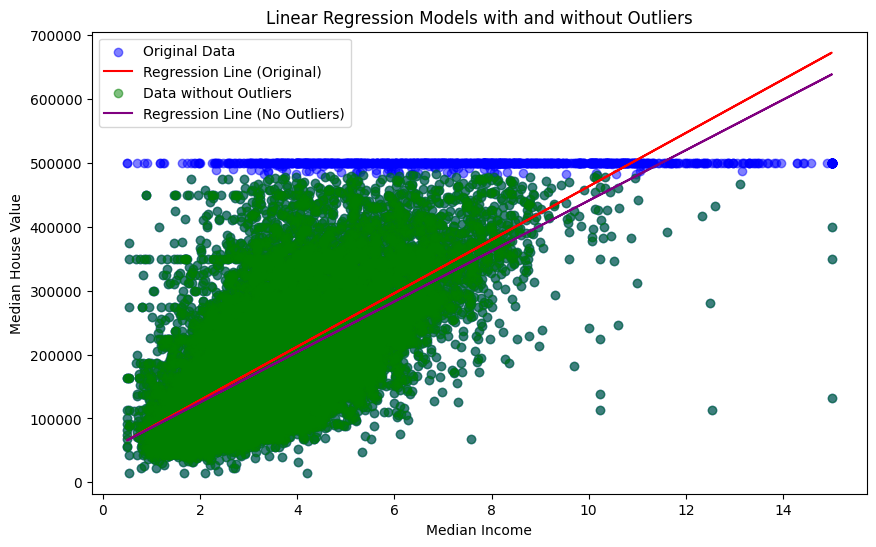

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame and it has been loaded
X = df[["median_income"]]
y = df["median_house_value"]

# Linear regression on data without outliers
X_no_outliers = df_no_outliers[["median_income"]]
y_no_outliers = df_no_outliers["median_house_value"]

# Plotting both linear regression lines on the same plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Original Data')
plt.plot(X, model1.predict(X), color='red', label='Regression Line (Original)')
plt.scatter(X_no_outliers, y_no_outliers, color='green', alpha=0.5, label='Data without Outliers')
plt.plot(X_no_outliers, model2.predict(X_no_outliers), color='purple', label='Regression Line (No Outliers)')
plt.title("Linear Regression Models with and without Outliers")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

In [19]:
model1 = a.export("model")

In [22]:
model1.fittedModel

In [8]:
b = GuidedStats(df)
b

GuidedStats(builtinAssumptions=['Outliers Checking', 'Levene Test', 'Normality Test', 'Multicollinearity Test'…

In [9]:
model2 = b.export("model")

In [20]:
model1.compare(model2)

Metric,Model 1,Model 2
R-squared,0.6888,0.8652
Adjusted R-squared,0.6858,0.8639
F-statistic,231.6694,671.9724
Prob (F-statistic),0.0000,0.0000
Log-Likelihood,-913.6175,233.2715
AIC,1835.2351,-458.5429
BIC,1850.2833,-443.4947
Coefficient (model year),,0.0288***
Coefficient (acceleration),0.0584,
Coefficient (displacement),-0.0158*,-0.0002


In [14]:
model1._results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     244.8
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           7.25e-82
Time:                        12:56:03   Log-Likelihood:                -908.77
No. Observations:                 318   AIC:                             1826.
Df Residuals:                     314   BIC:                             1841.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.3583      2.148     19.251      0.000      37.131      45.585
weight          -0.0065      0.001    -10.160      0.000      -0.008      -0.005
cylinders       -0.5084      0.334     -1.523      0.129      -1.165       0.149
acceleration     0.2635      0.099      2.662      0.008       0.069       0.458
==============================================================================
Omnibus:                       23.324   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.168
Skew:                           0.598   Prob(JB):                     7.65e-07
Kurtosis:                       3.834   Cond. No.                     2.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
df2 = pd.read_csv("auto-mpg.csv")
c = GuidedStats(df2)
c

GuidedStats(builtinAssumptions=['Outliers Checking', 'Levene Test', 'Normality Test', 'Multicollinearity Test'…

In [50]:
c.workflow.callStepForward()

In [51]:
c.workflow.currentStep

In [32]:
c.export("model")

In [33]:
c.export("report")

'A two independent sample t-test was conducted to compare the groups. The results indicated that the difference between the groups was statistically significant (t(317.0) = -8.915, p < .001). The mean (SD) for group 1 was 20.08 (6.40) and for group 2 was 27.89 (6.72).'

In [34]:
c.export("dataset")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [1]:
import pandas as pd
from guidedstats import GuidedStats
df = pd.read_csv("california_housing.csv")
b = GuidedStats(df)
b

GuidedStats(builtinAssumptions=['Outliers Checking', 'Levene Test', 'Normality Test', 'Multicollinearity Test'…

In [3]:
b.export("code",step_no=)

In [ ]:
# Step 1: Load Dataset
import pandas as pd

# Step 2: Select Dependent Variable
Y = df[['median_house_value']]

# Step 3: Check Outliers
# Function to check the assumption
def outlier(X, Y = None, *args, **kwargs):
    import numpy as np
    X = X.to_numpy().reshape((-1))
    previousX = kwargs.get("previousX", None)
    if previousX is not None:
        previousX = previousX.to_numpy().reshape((-1))
        Q1 = np.percentile(previousX, 25)
        Q3 = np.percentile(previousX, 75)
        IQR = Q3 - Q1
    else:
        Q1 = np.percentile(X, 25)
        Q3 = np.percentile(X, 75)
        IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    count = 0
    for item in X:
        if item < lower_threshold or item > upper_threshold:
            count += 1
    return {
        "stats": count,
        "count": count,
    }
for col in Y.columns:
    outputs = outlier(X = Y[[col]])
    print('{stats} outlier(s) fall outside of the "interquartile range" (IQR)'.format(**outputs))

# Step 4: Select Independent Variables
X = df[['median_income','housing_median_age']]
exog = X

# Step 5: Check Outliers
# Function to check the assumption
def outlier(X, Y = None, *args, **kwargs):
    import numpy as np
    X = X.to_numpy().reshape((-1))
    previousX = kwargs.get("previousX", None)
    if previousX is not None:
        previousX = previousX.to_numpy().reshape((-1))
        Q1 = np.percentile(previousX, 25)
        Q3 = np.percentile(previousX, 75)
        IQR = Q3 - Q1
    else:
        Q1 = np.percentile(X, 25)
        Q3 = np.percentile(X, 75)
        IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    count = 0
    for item in X:
        if item < lower_threshold or item > upper_threshold:
            count += 1
    return {
        "stats": count,
        "count": count,
    }
for col in X.columns:
    outputs = outlier(X = X[[col]])
    print('{stats} outlier(s) fall outside of the "interquartile range" (IQR)'.format(**outputs))

# Step 6: Check Multicollinearity
# Function to check the assumption
def VIF(exog: pd.DataFrame, design_matrix: pd.DataFrame, *args, **kwargs):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    QUANTITATIVE_DTYPES = ['float64', 'int64']
    # find the index of exog in design_matrix
    other_exogs = []
    for i in range(design_matrix.shape[1]):
        if design_matrix.columns[i] != exog.columns[0] and design_matrix.iloc[:, i].dtype in QUANTITATIVE_DTYPES:
            other_exogs.append(design_matrix.iloc[:, i])
    # concatenate other exogs with exog
    if len(other_exogs) != 0:
        design_matrix = pd.concat(other_exogs, axis=1)
        design_matrix = pd.concat([exog, design_matrix], axis=1)
        vif = variance_inflation_factor(design_matrix.values, 0)
        vif = round(vif, 6)
        return {
            "stats": vif,
            "annotation": ""
        }
    else:
        vif = None

    return {
        "stats": vif,
        "annotation": "for one predictor, there is no need to check multicollinearity"
    }
for col in X.columns:
    outputs = VIF(exog = X[[col]],design_matrix = exog)
    print('The VIF of the predictor is {stats}. {annotation}'.format(**outputs))

# Step 7: Do train test split

import numpy as np
trainSize = 1

indices = np.arange(len(X))
np.random.shuffle(indices)
train_indices = indices[:int(len(indices)*float(trainSize))]
test_indices = indices[int(
    len(indices)*(float(trainSize))):]

XTrain = X.iloc[train_indices]
XTest = X.iloc[test_indices]
yTrain = Y.iloc[train_indices]
yTest = Y.iloc[test_indices]

# Step 8: Train model
from guidedstats.model import Results
def naiveLR(X, Y, **kwargs):
    import statsmodels.api as sm
    X_wconstant = sm.add_constant(X)
    model = sm.OLS(Y, X_wconstant).fit()
    results = Results()
    results.setStat("params", model.params)
    results.setStat("pvalues", model.pvalues)
    results.setStat("df_resid", model.df_resid)
    results.setStat("df_model", model.df_model)
    results.setStat("rsquared", model.rsquared)
    results.setStat("rsquared_adj", model.rsquared_adj)
    results.setStat("fvalue", model.fvalue)
    results.setStat("f_pvalue", model.f_pvalue)
    results.setStat("conf_int", model.conf_int())
    results.setStat("bse", model.bse)
    results.setStat("llf", model.llf)
    results.setStat("aic", model.aic)
    results.setStat("bic", model.bic)
    return (model, results)
model,results = naiveLR(X = XTrain,Y = yTrain)

# Step 9: Evaluate the model

params = results.getStat("params")
p_values = results.getStat("pvalues")
columns = ['const', 'median_income', 'housing_median_age']
print("Model Parameters")
for i, col in enumerate(columns):
    print(col, "coefficient:", round(params[i], 4), "pvalue:", round(p_values[i], 6))
Y_hat_train = model.predict(XTrain)
Y_hat_train = Y_hat_train.to_numpy().reshape((-1))
Y_true_train = yTrain.to_numpy().reshape((-1))def mse(y_true, y_pred, *args, **kwargs):
    import numpy as np
    stats = np.mean((np.array(y_true)-np.array(y_pred))**2)
    return {
        "stats": stats,
    }

print("Training Set mse")
outputs = mse
                    (Y_true_train, Y_hat_train, XTrain)
print('mse
                                    ', round(outputs["stats"], 4))
def r2(y_true, y_pred, *args, **kwargs):
    from sklearn.metrics import r2_score
    stats = r2_score(y_true, y_pred)
    return {
        "stats": stats,
    }

print("Training Set r2")
outputs = r2
                    (Y_true_train, Y_hat_train, XTrain)
print('r2
                                    ', round(outputs["stats"], 4))
def adjusted_r2(y_true, y_pred, *args, **kwargs):
    from sklearn.metrics import r2_score
    n = len(y_true)
    exogs = args[0]
    p = exogs.shape[1]
    r2 = r2_score(y_true, y_pred)
    stats = 1 - (1-r2)*(n-1)/(n-p-1)
    return {
        "stats": stats,
    }

print("Training Set adjusted_r2")
outputs = adjusted_r2
                    (Y_true_train, Y_hat_train, XTrain)
print('adjusted_r2
                                    ', round(outputs["stats"], 4))


In [ ]:
# Step 1: Load Dataset
import pandas as pd

# Step 2: Select Dependent Variable
Y = df[['median_house_value']]

# Step 3: Check Outliers
# Function to check the assumption
def outlier(X, Y = None, *args, **kwargs):
    import numpy as np
    X = X.to_numpy().reshape((-1))
    previousX = kwargs.get("previousX", None)
    if previousX is not None:
        previousX = previousX.to_numpy().reshape((-1))
        Q1 = np.percentile(previousX, 25)
        Q3 = np.percentile(previousX, 75)
        IQR = Q3 - Q1
    else:
        Q1 = np.percentile(X, 25)
        Q3 = np.percentile(X, 75)
        IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    count = 0
    for item in X:
        if item < lower_threshold or item > upper_threshold:
            count += 1
    return {
        "stats": count,
    }
for col in Y.columns:
    outputs = outlier(X = Y[[col]])
    print('{stats} outlier(s) fall outside of the "interquartile range" (IQR)'.format(**outputs))


In [2]:
import numpy as np #new
# Step 1: Load Dataset
import pandas as pd

# Step 2: Select Dependent Variable
Y = df[['median_house_value']]

# Step 3: Check Outliers
# Function to check the assumption
def outlier(X, Y = None, *args, **kwargs):
    import numpy as np
    X = X.to_numpy().reshape((-1))
    previousX = kwargs.get("previousX", None)
    if previousX is not None:
        previousX = previousX.to_numpy().reshape((-1))
        Q1 = np.percentile(previousX, 25)
        Q3 = np.percentile(previousX, 75)
        IQR = Q3 - Q1
    else:
        Q1 = np.percentile(X, 25)
        Q3 = np.percentile(X, 75)
        IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    outliers = [] #new
    for item in X:
        if item < lower_threshold or item > upper_threshold:
            outliers.append(item) #new
    return outliers #new
for col in Y.columns:
    outliers = outlier(X = Y[[col]])
    print(f'-- {col} --') #new
    print(np.unique(outliers,return_counts=True)) #new


-- median_house_value --
(array([482700., 482900., 483100., 483300., 483500., 483600., 483700.,
       483800., 484100., 484600., 484700., 485000., 485100., 485300.,
       485400., 485700., 486400., 486800., 486900., 487000., 487100.,
       487200., 487500., 487800., 488500., 488900., 489000., 489600.,
       489800., 490000., 490300., 490400., 490800., 491200., 492000.,
       492200., 492300., 492500., 492900., 493000., 493200., 493300.,
       493400., 493800., 494000., 494400., 494700., 495400., 495500.,
       495600., 495800., 495900., 496000., 496400., 497400., 497600.,
       498400., 498600., 498700., 498800., 499000., 499100., 500000.,
       500001.]), array([  1,   1,   1,   6,   1,   1,   1,   1,   1,   2,   1,   3,   1,
         2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   2,
         1,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   2,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   3,   2,   1,   1,
         1,   2,   1,   1,   1,   1,  

In [3]:
dataset = df[df["median_house_value"] != 500001]
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
b._import("dataset",dataset)

In [2]:
dataset = b.export("dataset")
dataset = dataset.dropna()
b._import("dataset",dataset)

In [6]:
dataset = b.export("dataset")
dataset["avg_rooms"] = dataset["total_rooms"]/dataset["population"]
dataset["avg_bedrooms"] = dataset["total_bedrooms"]/dataset["population"]
dataset["avg_household_size"] = dataset["population"]/dataset["households"]
b._import("dataset",dataset)

/var/folders/fx/94vx28g17c9172vwjsxbmsk80000gn/T/ipykernel_80252/2657808041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["avg_rooms"] = dataset["total_rooms"]/dataset["population"]
/var/folders/fx/94vx28g17c9172vwjsxbmsk80000gn/T/ipykernel_80252/2657808041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["avg_bedrooms"] = dataset["total_bedrooms"]/dataset["population"]
/var/folders/fx/94vx28g17c9172vwjsxbmsk80000gn/T/ipykernel_80252/2657808041.py:4: SettingWithCopyWarning: 
A value

In [9]:
model1 = b.export("model")

In [8]:
model2 = b.export("model")

In [10]:
model1.compare(model2)

Metric,Model 1,Model 2
R-squared,0.4956,0.4731
Adjusted R-squared,0.4955,0.4729
F-statistic,4782.6315,3495.6283
Prob (F-statistic),0.0000,0.0000
Log-Likelihood,-244730.6601,-245156.4445
AIC,489471.3201,490324.8891
BIC,489510.7045,490372.1504
Coefficient (households),,35.7468***
Coefficient (avg_household_size),,-331.9877***
Coefficient (housing_median_age),1571.1281***,1954.1759***


In [16]:
dataset = b.export("dataset")
dataset.to_csv("dataset.csv",index=False)

In [17]:
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define the target variable
target = 'median_house_value'

# Get a list of all possible predictors
predictors = dataset.columns.drop([target, 'ocean_proximity'])  # Exclude the target and non-numeric column

# Store the best combination of predictors and its corresponding R-squared value
best_combination = None
best_r2 = float('-inf')

# Iterate through all possible combinations of predictors
for i in range(1, len(predictors) + 1):
    for combo in combinations(predictors, i):
        # Prepare the data
        X = dataset[list(combo)]
        y = dataset[target]
        
        # Fit the linear regression model
        model = LinearRegression()
        model.fit(X, y)
        
        # Make predictions and calculate R-squared
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
        
        # Update the best combination if a better R-squared is found
        if r2 > best_r2:
            best_r2 = r2
            best_combination = combo

# Display the best combination of predictors and its R-squared value
best_combination, best_r2


(('longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'avg_rooms',
  'avg_bedrooms',
  'avg_household_size'),
 0.6080320312919005)

In [12]:
model1.compare(model2)

Metric,Model 1,Model 2
R-squared,0.0209,0.0209
Adjusted R-squared,0.0209,0.0209
F-statistic,436.5537,436.5537
Prob (F-statistic),0.0000,0.0000
Log-Likelihood,-266953.2965,-266953.2965
AIC,533910.5929,533910.5929
BIC,533926.4427,533926.4427
Coefficient (latitude),-7815.3985***,-7815.3985***
Coefficient (const),485352.2387***,485352.2387***


In [2]:
dataset = b.export("dataset")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
dataset = dataset.dropna()

In [5]:
b._import("dataset",dataset)

In [3]:
#import dataset back
dataset["avg_bedrooms"] = dataset["total_bedrooms"]/dataset["population"]

In [4]:
b._import("dataset",dataset)

In [12]:
b.export("code",step_no = 6, export_viz_func = True)

In [3]:
dataset = b.export("dataset")

In [7]:
dataset = dataset.dropna()

In [3]:
import pandas as pd
from guidedstats import GuidedStats

df = pd.read_csv("TeachingRatings.csv")
c = GuidedStats(df)
c

GuidedStats(builtinAssumptions=['Outliers Checking', 'Levene Test', 'Normality Test', 'Multicollinearity Test'…

In [7]:
c.workflowInfo

{'workflowName': 'T Test',
 'currentStepId': 0,
 'message': '',
 'report': '<h7 class="text-blue-700">Two Independent Sample T-Test</h7><p>A two independent sample t-test was conducted to compare the difference of means between female and male of eval. The results indicated that the difference between the groups was statistically significant (t(425.75580435680354) = -3.267, p = 0.00). The mean (SD) for group 1 is 3.90 (0.54) and for group 2 is 4.07 (0.56).</p>',
 'action': {},
 'steps': [{'stepId': 0,
   'stepName': 'Load Dataset',
   'stepType': 'LoadDatasetStep',
   'stepExplanation': 'Load the dataset that will be used for t-test.        This is the first step in the workflow and is essential for          initializing the dataset for subsequent steps.',
   'suggestions': [],
   'done': True,
   'isProceeding': False,
   'toExecute': False,
   'isShown': False,
   'config': {'dataset': 'df'},
   'previousConfig': {},
   'groupConfig': {},
   'message': ''},
  {'stepId': 1,
   'stepNa

In [4]:
c.export("code")

In [1]:
import pandas as pd
from guidedstats import GuidedStats

df = pd.read_csv("auto-mpg.csv")
d = GuidedStats(df)
d

GuidedStats(builtinAssumptions=['Outliers Checking', 'Levene Test', 'Normality Test', 'Multicollinearity Test'…

In [11]:
d.workflowInfo

{'workflowName': 'T Test',
 'currentStepId': 0,
 'message': '',
 'report': '',
 'action': {},
 'presets': [{'name': 'equal_var', 'stepId': 4, 'value': 'false'}],
 'steps': [{'stepId': 0,
   'stepName': 'Load Dataset',
   'stepType': 'LoadDatasetStep',
   'stepExplanation': 'Load the dataset that will be used for t-test.        This is the first step in the workflow and is essential for          initializing the dataset for subsequent steps.',
   'suggestions': [],
   'done': True,
   'isProceeding': False,
   'toExecute': False,
   'isShown': False,
   'config': {'dataset': 'df'},
   'previousConfig': {},
   'groupConfig': {},
   'message': ''},
  {'stepId': 1,
   'stepName': 'Select Independent Variable',
   'stepType': 'VariableSelectionStep',
   'stepExplanation': 'Identify the independent variable for the t-test.         This variable is the focus of the analysis and the basis for comparison between groups.',
   'suggestions': [],
   'done': True,
   'isProceeding': False,
   'toEx

In [17]:
d.workflow.presets = [{'name': 'equal_var', 'stepId': 4, 'value': 'false'}]

In [18]:
dataset = d.export("dataset")

In [19]:
dataset['origin'] = dataset.origin.astype('category')

In [20]:
d._import("dataset",dataset)